<a href="https://colab.research.google.com/github/SafeiaSherif/SafeiaSherif/blob/main/Global_country_info_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

**This dataset is small, so it's very hard to find relationships among its attributes.**

**Description**

This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

**Key Features**


*   Country: Name of the country.
*   Density (P/Km2): Population density measured in persons per square kilometer.
*   Abbreviation: Abbreviation or code representing the country.
*   Agricultural Land (%): Percentage of land area used for agricultural purposes.
*   Land Area (Km2): Total land area of the country in square kilometers.
*   Armed Forces Size: Size of the armed forces in the country.
*   Birth Rate: Number of births per 1,000 population per year.
*   Calling Code: International calling code for the country.
*   Capital/Major City: Name of the capital or major city.
*   CO2 Emissions: Carbon dioxide emissions in tons.
*   CPI: Consumer Price Index, a measure of inflation and purchasing power.
*   CPI Change (%): Percentage change in the Consumer Price Index compared to the previous year.
*   Fertility Rate: Average number of children born to a woman during her lifetime.
*   Forested Area (%): Percentage of land area covered by forests.
*   Gasoline_Price: Price of gasoline per liter in local currency.
*   GDP: Gross Domestic Product, the total value of goods and services produced in the country.
*   Gross Primary Education Enrollment (%): Gross enrollment ratio for primary education.
*   Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education.
*   Infant Mortality: Number of deaths per 1,000 live births before reaching one year of age.
*   Largest City: Name of the country's largest city.
*   Life Expectancy: Average number of years a newborn is expected to live.
*   Maternal Mortality Ratio: Number of maternal deaths per 100,000 live births.
*   Minimum Wage: Minimum wage level in local currency.
*   Official Language: Official language(s) spoken in the country.
*   Out of Pocket Health Expenditure (%): Percentage of total health expenditure paid out-of-pocket by individuals.
*   Physicians per Thousand: Number of physicians per thousand people.
*   Population: Total population of the country.
*   Population: Labor Force Participation (%): Percentage of the population that is part of the labor force.
*   Tax Revenue (%): Tax revenue as a percentage of GDP.
*   Total Tax Rate: Overall tax burden as a percentage of commercial profits.
*   Unemployment Rate: Percentage of the labor force that is unemployed.
*   Urban Population: Percentage of the population living in urban areas.
*   Latitude: Latitude coordinate of the country's location.
*   Longitude: Longitude coordinate of the country's location.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data_sets/world-data-2023.csv')

In [7]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

From the previous output, there are many columns that need to be transformed from object data type to float data type.

The next cell contains a function for this issue.

In [9]:
# Function to transform object data type to float
def obj_to_float(df_x, col):
  for i in col:
    print(i)
    df_x[i].fillna("0", inplace=True)
    df_x[i] = df_x[i].str.replace(",", "").str.replace("%", "").str.replace("$", "").astype(float)
  return df_x

In [10]:
columns = ["Density\n(P/Km2)", "Agricultural Land( %)", "Land Area(Km2)", "Armed Forces size",
           "Co2-Emissions", "CPI", "CPI Change (%)", "Forested Area (%)", "Gasoline Price", "GDP",
           "Gross primary education enrollment (%)", "Gross tertiary education enrollment (%)",
           "Minimum wage", "Out of pocket health expenditure",
           "Population", "Population: Labor force participation (%)", "Tax revenue (%)",
           "Total tax rate", "Unemployment rate", "Urban_population"]

In [11]:
df0 = df.copy()
clean_df = obj_to_float(df0, columns)

Density
(P/Km2)
Agricultural Land( %)
Land Area(Km2)
Armed Forces size
Co2-Emissions
CPI
CPI Change (%)
Forested Area (%)
Gasoline Price
GDP
Gross primary education enrollment (%)
Gross tertiary education enrollment (%)
Minimum wage
Out of pocket health expenditure
Population
Population: Labor force participation (%)
Tax revenue (%)
Total tax rate
Unemployment rate
Urban_population


<ipython-input-9-6541767f04af>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_x[i] = df_x[i].str.replace(",", "").str.replace("%", "").str.replace("$", "").astype(float)


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      195 non-null    float64
 4   Land Area(Km2)                             195 non-null    float64
 5   Armed Forces size                          195 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              195 non-null    float64
 10  CPI                       

In [13]:

fig = px.scatter_mapbox(
    clean_df,
    lat="Latitude",
    lon="Longitude",
    color="Co2-Emissions",
    size="Agricultural Land( %)",
    width=1200,
    height=800,
    hover_data=["Country"],
    zoom=1,
    title="countries, Agricultural Land and Co2-Emissions",
    mapbox_style="open-street-map",
)
fig.show()


In [14]:

fig = px.scatter_mapbox(
    clean_df,
    lat="Latitude",
    lon="Longitude",
    color="Total tax rate",
    size="Population: Labor force participation (%)",
    labels={"Total tax rate":"Tax rate", "Population: Labor force participation (%)":"Labor force %"},
    width=1200,
    height=800,
    hover_data=["Country"],
    zoom=1,
    title="countries, Total tax rate and Population: Labor force participation",
    mapbox_style="open-street-map",
)
fig.show()


In [15]:

fig = px.scatter_mapbox(
    clean_df,
    lat="Latitude",
    lon="Longitude",
    color="GDP",
    size="Gross tertiary education enrollment (%)",
    labels={"Total tax rate":"Tax rate", "Gross tertiary education enrollment (%)":"tertiary education enroll"},
    width=1200,
    height=800,
    hover_data=["Country"],
    zoom=1,
    title="countries, Gross tertiary education enrollment and GDP",
    mapbox_style="open-street-map",
)
fig.show()


In [17]:
# Out of pocket health expenditure and Life expectancy plot

fig = px.scatter(
    df1,
    x="Out of pocket health expenditure",
    y="Life expectancy",
    labels={"Out of pocket health expenditure":"Out of pocket health expenditure", "Life expectancy":"Life expectancy"},
    width=600,
    height=500,
    hover_data=["Country"],
)
fig.show()
# No relation between the Life expectancy and Out of pocket health expenditure

In [18]:
# Map for countries and their population and armed forces size
fig = px.scatter_mapbox(
    clean_df,
    lat="Latitude",
    lon="Longitude",
    color="Armed Forces size",
    size="Population",
    width=1200,
    height=800,
    hover_data=["Country"],
    zoom=1,
    title="countries, population and armed forces size",
    mapbox_style="open-street-map",
)
fig.show()


In [19]:
# Out of pocket health expenditure and Life expectancy plot

fig = px.scatter(
    clean_df,
    x="Population",
    y="Armed Forces size",
    width=600,
    height=500,
    hover_data=["Country"],
)
fig.show()

In [20]:
df1 = clean_df.copy()
qntl10 = df1["Population"].quantile(0.1)
qntl90 = df1["Population"].quantile(0.9)
mask = df1["Population"].between(qntl10, qntl90)
df1 = df1[mask]

qntl10 = df1["Armed Forces size"].quantile(0.1)
qntl90 = df1["Armed Forces size"].quantile(0.9)
mask = df1["Armed Forces size"].between(qntl10, qntl90)
df1 = df1[mask]


In [21]:
# Out of pocket health expenditure and Life expectancy plot

fig = px.scatter(
    df1,
    x="Population",
    y="Armed Forces size",
    width=600,
    height=500,
    hover_data=["Country"],
)
fig.show()

In [22]:
correlation = df1["Population"].corr(df1["Armed Forces size"])
correlation
# Weak correlation between the population and the armed forces size

0.48706454101583707

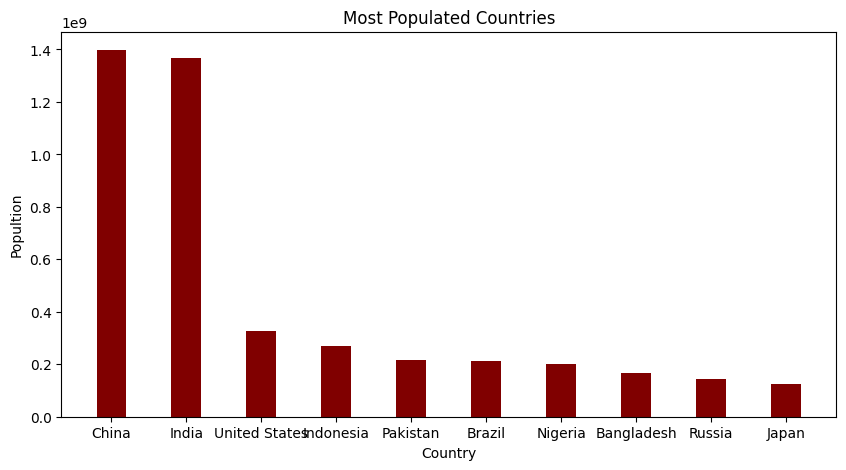

In [23]:
top_countries = clean_df.copy()
top_countries = top_countries.sort_values(by="Population", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(top_countries["Country"][:10], top_countries["Population"][:10], color="maroon", width=0.4)
plt.title("Most Populated Countries")
plt.xlabel("Country")
plt.ylabel("Popultion")
plt.show()

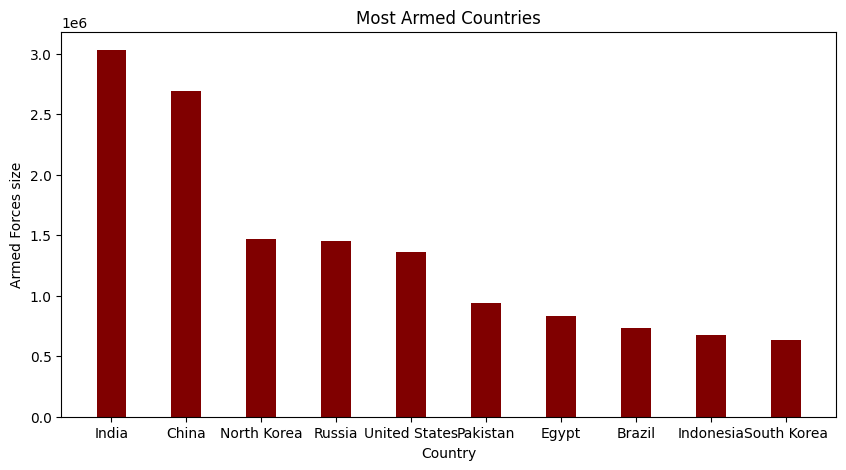

In [24]:
top_countries = clean_df.copy()
top_countries = top_countries.sort_values(by="Armed Forces size", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(top_countries["Country"][:10], top_countries["Armed Forces size"][:10], color="maroon", width=0.4)
plt.title("Most Armed Countries")
plt.xlabel("Country")
plt.ylabel("Armed Forces size")
plt.show()